In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
lfc_df = pd.read_csv('adult_lfc.csv', index_col=0)
pval_df = pd.read_csv('adult_padj.csv', index_col=0)

lfc_df = lfc_df.iloc[:, :]
pval_df = pval_df.iloc[:, :]

In [3]:
def neglog_scale(x):
    if x != x:
        return None
    elif x == 0:
        return math.inf
    else:
        return -math.log(x, 10)

log_pval_df = pval_df.applymap(neglog_scale)

log_pval_df

,wt+20°C_vs_nhl-2+20°C_PRJNA311537,wt+25°C_vs_nhl-2+25°C_PRJNA311537,ev_vs_NaCl_PRJNA421159,wt(EV)_vs_dpy(e88);skn-1(RNAi)_PRJNA421159,wt(EV)_vs_dpy(e88)_PRJNA421159,ev_vs_skn-1(RNAi)_PRJNA421159,wt_vs_morc-1(tm6048)_PRJNA353647,wt+20°C_vs_nhl-2+20°C_PRJNA398116,wt+25°C_vs_nhl-2+25°C_PRJNA398116,wt_vs_cey-1(rrr12);cey-4(ok585)_PRJNA265852,...,fed+20ºC_vs_starved+20ºC_PRJEB14837,no treatment_vs_DMSO_PRJNA391939,no treatment_vs_AZT_PRJNA391939,no treatment_vs_d4T_PRJNA391939,no treatment_vs_FLT_PRJNA391939,wt_vs_isp-1;sod-3_PRJNA376493,wt_vs_isp-1_PRJNA376493,wt_vs_emr-1(gk119)_PRJNA190895,wt_vs_lem-2(tm1582)_PRJNA190895,wt_vs_lem-2(tm1582);emr-1(RNAi)_PRJNA190895
2L52.1,0.137241,0.233684,0.540888,0.930788,0.160175,0.101877,0.098880,1.084108,0.227872,0.287162,...,0.208000,5.329976,0.213177,0.286305,3.677489,0.282262,1.065560,0.423566,0.890261,1.019146
2RSSE.1,0.078294,1.242705,0.059268,9.326558,4.860042,0.004519,0.015328,0.213821,1.068711,0.663000,...,0.146399,7.750733,0.442037,1.705828,2.135397,0.469720,1.336618,0.294506,0.063111,0.632505
4R79.2,0.003617,0.402360,0.321139,0.625585,2.482594,0.067701,NaN,0.495038,0.250913,0.017944,...,0.031570,0.208659,0.169458,0.038891,0.369955,0.083624,0.295386,1.715164,0.348173,2.003537
6R55.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037687
aagr-1,0.300745,3.613369,0.386090,0.787875,0.030912,0.086507,0.140142,0.653224,0.084460,2.655093,...,0.094921,29.389380,1.147384,3.825654,9.372456,2.125157,0.139594,0.243906,0.598368,0.012698
aagr-2,0.385026,4.584215,1.105673,0.090953,4.182753,8.344444,0.015328,0.578289,0.295146,0.320241,...,4.313471,12.487669,6.219829,0.563606,1.176247,0.372149,2.034760,0.145453,0.931491,1.368127
aagr-3,0.003617,0.394362,1.235459,0.024377,1.043680,4.773983,0.035913,1.117934,2.225437,0.855458,...,1.375929,2.515419,6.050299,0.022931,0.329374,0.465674,0.477368,0.033233,0.116684,0.825306
aagr-4,0.003617,0.228198,1.564566,28.456951,9.751050,1.400372,0.019980,0.169736,0.869421,1.000275,...,0.011571,9.782593,16.709383,0.038058,2.331005,2.131631,10.853541,38.980508,2.032580,14.911805
aak-1,0.011611,0.991079,0.475649,3.718799,2.398046,0.378128,0.015328,0.081174,0.664595,0.075296,...,0.137342,2.309734,3.466531,0.685738,1.985377,0.015060,0.215181,0.094445,0.039404,2.554578
aak-2,0.001792,0.054705,0.010278,0.791246,3.099366,1.163846,0.015328,0.044859,1.508362,0.003565,...,0.551884,7.534290,0.546936,1.104045,3.369849,0.276952,0.450152,0.312673,1.200874,1.444072


In [4]:
def max_gap_cut(data):
    if len(data) == 0:
        return None
    elif len(data) == 1:
        return data[0]

    data = data[~np.isnan(data)]
    data = np.sort(data)
    dx = np.diff(data)
    
    if len(dx) == 0:
        return None

    dx_argmax = np.argmax(dx)

    return data[dx_argmax] + dx[dx_argmax]/2

low_log_pval = 1
high_log_pval = 3

log_pval_range_df = log_pval_df.copy()
log_pval_range_df[log_pval_df < low_log_pval] = None
log_pval_range_df[log_pval_df > high_log_pval] = None

log_pval_cut_df = log_pval_range_df.apply(max_gap_cut, axis=1)

log_pval_cut_df

2L52.1     1.797614
2RSSE.1    2.653012
4R79.2     2.735615
6R55.2          NaN
aagr-1     2.395025
aagr-2     2.148651
aagr-3     1.663000
aagr-4     2.831862
aak-1      1.590603
aak-2      1.871380
aakb-1     2.701002
aakb-2     2.476871
aakg-1     2.309983
aakg-2     1.675290
aakg-3     1.813687
aakg-4     2.053601
aakg-5     2.123071
aap-1      2.532146
aars-1     1.651227
aars-2     2.743565
aat-1      1.491583
aat-2      2.605230
aat-3      2.721502
aat-4      2.439527
aat-5      2.304001
aat-6      2.311606
aat-7      2.104572
aat-8      2.370099
aat-9      1.961390
abce-1     1.662384
             ...   
ztf-11     2.604387
ztf-13     1.215163
ztf-14     1.632264
ztf-15     2.704740
ztf-16     2.209554
ztf-17     1.973189
ztf-18     2.199420
ztf-2      2.279827
ztf-20     2.290529
ztf-22     1.872924
ztf-23     1.928990
ztf-25     1.932985
ztf-26     2.443976
ztf-27     1.650884
ztf-28     1.728445
ztf-29     1.526352
ztf-3      2.314852
ztf-30     1.874218
ztf-4      2.099275


In [5]:
log_pval_diff_df = log_pval_df.sub(log_pval_cut_df, axis='index')

insig_df = log_pval_df.copy()
insig_df[log_pval_diff_df > 0] = None
insig_df[log_pval_diff_df < 0] = 1

sig_df = log_pval_df.copy()
sig_df[log_pval_diff_df < 0] = None
sig_df[log_pval_diff_df > 0] = 1

In [6]:
# = 0 if we treat upreg as "zero downreg." Alternative is set to None

insig_lfc_df = insig_df*lfc_df

upreg_insig_df = insig_lfc_df.copy()
upreg_insig_df[insig_lfc_df < 0] = 0

downreg_insig_df = insig_lfc_df.copy()
downreg_insig_df[insig_lfc_df > 0] = 0

In [7]:
low_perc = 85
high_perc = 95

low_perc_upreg_df = upreg_insig_df.apply(
    lambda data: np.nanpercentile(data, low_perc), axis=1)

high_perc_upreg_df = upreg_insig_df.apply(
    lambda data: np.nanpercentile(data, high_perc), axis=1)

low_perc_downreg_df = downreg_insig_df.apply(
    lambda data: np.nanpercentile(data, 100-low_perc), axis=1)

high_perc_downreg_df = downreg_insig_df.apply(
    lambda data: np.nanpercentile(data, 100-high_perc), axis=1)

/home/carlos/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


In [8]:
sig_lfc_df = sig_df*lfc_df

upreg_sig_df = sig_lfc_df.copy()
upreg_sig_df[sig_lfc_df < 0] = None

downreg_sig_df = sig_lfc_df.copy()
downreg_sig_df[sig_lfc_df > 0] = None

In [9]:
upreg_range_df = upreg_sig_df.copy()
upreg_range_df[upreg_sig_df.lt(low_perc_upreg_df, axis=0)] = None
upreg_range_df[upreg_sig_df.gt(high_perc_upreg_df, axis=0)] = None

upreg_cut_df = upreg_range_df.apply(max_gap_cut, axis=1)

# if it's nan then have cutoff be high percentile
upreg_cut_df = upreg_cut_df.fillna(high_perc_upreg_df)

downreg_range_df = downreg_sig_df.copy()
downreg_range_df[downreg_sig_df.gt(low_perc_downreg_df, axis=0)] = None
downreg_range_df[downreg_sig_df.lt(high_perc_downreg_df, axis=0)] = None

downreg_cut_df = downreg_range_df.apply(max_gap_cut, axis=1)
downreg_cut_df = downreg_cut_df.fillna(high_perc_downreg_df)

In [10]:
diff_exp_df = sig_lfc_df.copy()
diff_exp_df[:] = 0
diff_exp_df[sig_lfc_df.gt(upreg_cut_df, axis=0)] = 1
diff_exp_df[sig_lfc_df.lt(downreg_cut_df, axis=0)] = -1

diff_exp_df

,wt+20°C_vs_nhl-2+20°C_PRJNA311537,wt+25°C_vs_nhl-2+25°C_PRJNA311537,ev_vs_NaCl_PRJNA421159,wt(EV)_vs_dpy(e88);skn-1(RNAi)_PRJNA421159,wt(EV)_vs_dpy(e88)_PRJNA421159,ev_vs_skn-1(RNAi)_PRJNA421159,wt_vs_morc-1(tm6048)_PRJNA353647,wt+20°C_vs_nhl-2+20°C_PRJNA398116,wt+25°C_vs_nhl-2+25°C_PRJNA398116,wt_vs_cey-1(rrr12);cey-4(ok585)_PRJNA265852,...,fed+20ºC_vs_starved+20ºC_PRJEB14837,no treatment_vs_DMSO_PRJNA391939,no treatment_vs_AZT_PRJNA391939,no treatment_vs_d4T_PRJNA391939,no treatment_vs_FLT_PRJNA391939,wt_vs_isp-1;sod-3_PRJNA376493,wt_vs_isp-1_PRJNA376493,wt_vs_emr-1(gk119)_PRJNA190895,wt_vs_lem-2(tm1582)_PRJNA190895,wt_vs_lem-2(tm1582);emr-1(RNAi)_PRJNA190895
2L52.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2RSSE.1,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4R79.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6R55.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aagr-1,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
aagr-2,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aagr-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aagr-4,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0
aak-1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0
aak-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


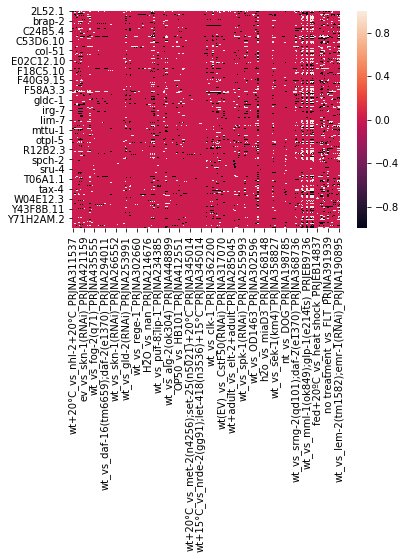

In [11]:
sns.heatmap(diff_exp_df)

In [12]:
diff_exp_df.to_csv('adult_diff_exp.csv')